In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ezrie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ezrie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [23]:
pip install seaborn


     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00


### make heatmap of correlation between variables 


16
9


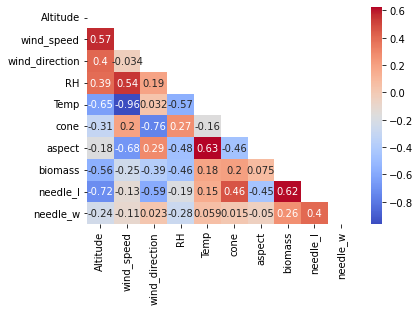

In [13]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.color_palette('vlag', as_cmap= True)
#import scipy
#import sklearn ## scikit-learn
#from sklearn.linear_model import LinearRegression

##### edit these bits ####
transect_data = 'transect_1_processed.csv'


##########################################


transect_data = pd.read_csv(transect_data)
transect_rows,transect_columns = transect_data.shape


print(transect_columns)
print(transect_rows)

## number of rows in = number of sites on transect
## there are 2 extra columns - for index + site names, so take into account if accessing columns
transect_data_df = pd.DataFrame(transect_data)
#print(transect_data_df)

corr = transect_data_df[['Altitude','wind_speed','wind_direction','RH','Temp','cone','aspect','biomass','needle_l','needle_w']].corr()

matrix = np.triu(corr)

heat = sns.heatmap(corr, mask = matrix, annot = True, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
fig = heat.get_figure()

#plt.show()
fig.savefig('transect_1_corr.png')

16
9


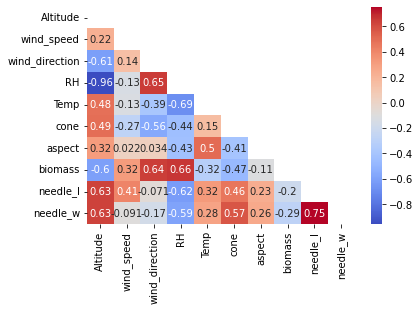

In [14]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.color_palette('vlag', as_cmap= True)
#import scipy
#import sklearn ## scikit-learn
#from sklearn.linear_model import LinearRegression

##### edit these bits ####
transect_data = 'transect_2_processed.csv'


##########################################


transect_data = pd.read_csv(transect_data)
transect_rows,transect_columns = transect_data.shape


print(transect_columns)
print(transect_rows)

## number of rows in = number of sites on transect
## there are 2 extra columns - for index + site names, so take into account if accessing columns
transect_data_df = pd.DataFrame(transect_data)
#print(transect_data_df)

corr = transect_data_df[['Altitude','wind_speed','wind_direction','RH','Temp','cone','aspect','biomass','needle_l','needle_w']].corr()

matrix = np.triu(corr)

heat = sns.heatmap(corr, mask = matrix, annot = True, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
fig = heat.get_figure()

#plt.show()
fig.savefig('transect_2_corr.png')

12
3


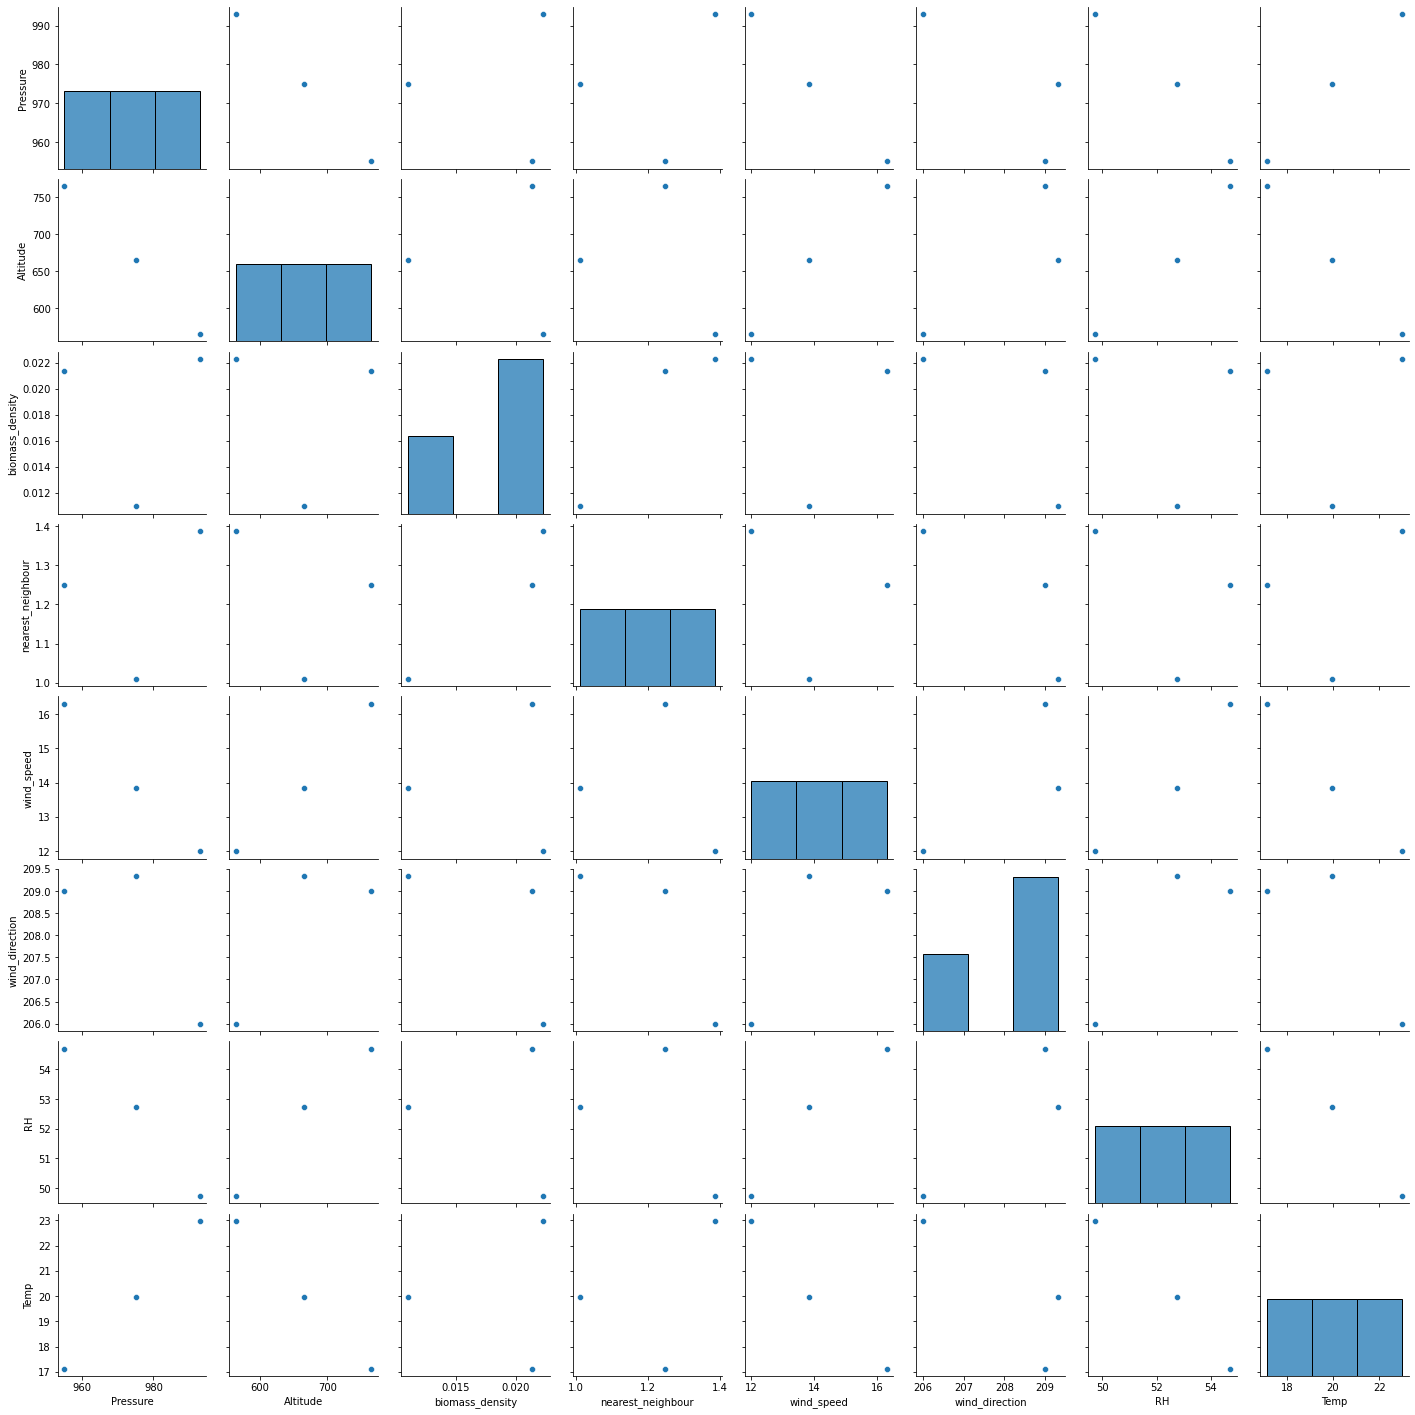

In [28]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy
#import sklearn ## scikit-learn
#from sklearn.linear_model import LinearRegression

##### edit these bits ####
transect_data = 'transect_1.csv'


##########################################


transect_data = pd.read_csv(transect_data)
transect_rows,transect_columns = transect_data.shape


print(transect_columns)
print(transect_rows)

## number of rows in = number of sites on transect
## there are 2 extra columns - for index + site names, so take into account if accessing columns
transect_data_df = pd.DataFrame(transect_data)
#print(transect_data_df)

sns.pairplot(transect_data[['Pressure','Altitude','biomass_density','nearest_neighbour','wind_speed','wind_direction','RH','Temp']].dropna)

#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [37]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import r2_score


#import sklearn ## scikit-learn
#from sklearn.linear_model import LinearRegression

##### edit these bits ####
transect_data = 'transect_1.csv'


##########################################


transect_data = pd.read_csv(transect_data)
transect_rows,transect_columns = transect_data.shape


print(transect_columns)
print(transect_rows)

## number of rows in = number of sites on transect
## there are 2 extra columns - for index + site names, so take into account if accessing columns
transect_data_df = pd.DataFrame(transect_data)
#print(transect_data_df)

corr = transect_data_df[['Pressure','Altitude','biomass_density','nearest_neighbour','wind_speed','wind_direction','RH','Temp']].corr()
print(corr)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(transect_data_df[['Temp','biomass_density']])
print(r_value)
print(p_value)

r2_value = r_value**2

12
3
                   Pressure  Altitude  biomass_density  nearest_neighbour  \
Pressure           1.000000 -0.999539         0.045800           0.333006   
Altitude          -0.999539  1.000000        -0.076120          -0.361492   
biomass_density    0.045800 -0.076120         1.000000           0.957187   
nearest_neighbour  0.333006 -0.361492         0.957187           1.000000   
wind_speed        -0.998518  0.996404         0.008639          -0.281191   
wind_direction    -0.799169  0.817057        -0.637078          -0.832927   
RH                -0.988782  0.992863        -0.194493          -0.470109   
Temp               0.998902 -0.999864         0.092555           0.376821   

                   wind_speed  wind_direction        RH      Temp  
Pressure            -0.998518       -0.799169 -0.988782  0.998902  
Altitude             0.996404        0.817057  0.992863 -0.999864  
biomass_density      0.008639       -0.637078 -0.194493  0.092555  
nearest_neighbour   -0.281191

- want to do percentage difference between mean values of sites
- anova ?? 
- t test?? 

In [12]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

df_1 = pd.read_csv('transect_1_processed.csv')
df_2 = pd.read_csv('transect_2_processed.csv') 

variable_n= ['ws', 'wd', 'rh','temp', 'co', 'asp','lit','bio','nel','new']
df_var = ['wind_speed','wind_direction','RH','Temp','cone','aspect','litter','biomass','needle_l','needle_w']

# have to do comparison of different means seperately 
b_stat, b_pvalue = stats.ttest_ind(df_1['biomass'],df_2['biomass'])
ws_stat, ws_pvalue = stats.ttest_ind(df_1['wind_speed'],df_2['wind_speed'])
wd_stat, wd_pvalue = stats.ttest_ind(df_1['wind_direction'],df_2['wind_direction'])
rh_stat, rh_pvalue = stats.ttest_ind(df_1['RH'],df_2['RH'])



print(b_stat)
print(b_pvalue)

-0.1597991199679662
0.87503925272526
